In [0]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prep
import keras.backend as K
from tensorflow import keras

%config InlineBackend.figure_format = 'svg'

In [0]:
olivetti = fetch_olivetti_faces()
data = olivetti.data
target = olivetti.target

In [364]:
print (target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [0]:
data = data.reshape((400, 64, 64))

In [366]:

train_x, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1)
print (target.shape)

(400,)


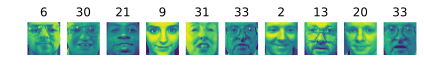

In [367]:
fig, axes = plt.subplots(1, 10, figsize=(7, 3))
for img, label, ax in zip(train_x[:10], y_train[:10], axes):
    ax.set_title(label)
    
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [368]:
print(f'train images: {train_x.shape}')
print(f'train labels: {y_train.shape}')
print(f' test images: {x_test.shape}')
print(f' test labels: {y_test.shape}')

train images: (360, 64, 64)
train labels: (360,)
 test images: (40, 64, 64)
 test labels: (40,)


In [0]:
train_x = train_x.reshape(360, 64 * 64) / 255
x_test = x_test.reshape(40, 64 * 64) / 255

with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train, 40))
    y_test = sesh.run(tf.one_hot(y_test, 40))

In [370]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [0]:
learning_rate = 0.01
epochs = 1000000
batch_size =150
batches = int(train_x.shape[0] / batch_size)

In [0]:
X = tf.placeholder(tf.float32, [None, 4096])
Y = tf.placeholder(tf.float32, [None, 40])

W = tf.Variable(0.1*np.random.randn(4096, 40).astype(np.float32))
B = tf.Variable(0.1* np.random.randn(40).astype(np.float32))

In [0]:
pred = tf.nn.softmax(tf.add(tf.matmul(X, W), B))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
loss = pred - Y
momentum = 0.0

optimizer = tf.train.MomentumOptimizer(0.1,momentum, True).minimize(cost)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
acc_test = []
train_cost = []

epoch: 0 cost=3.6924
epoch:50000 cost=3.5004
epoch:100000 cost=3.3473
epoch:150000 cost=3.2031
epoch:200000 cost=3.0674
epoch:250000 cost=2.9393
epoch:300000 cost=2.8183
epoch:350000 cost=2.7039
epoch:400000 cost=2.5957
epoch:450000 cost=2.4931
epoch:500000 cost=2.3959
epoch:550000 cost=2.3036
epoch:600000 cost=2.2161
epoch:650000 cost=2.1329
epoch:700000 cost=2.0539
epoch:750000 cost=1.9788
epoch:800000 cost=1.9075
epoch:850000 cost=1.8396
epoch:900000 cost=1.7751
epoch:950000 cost=1.7137
Accuracy of test set: 72.50%
Accuracy of the trianing set: 91.39%


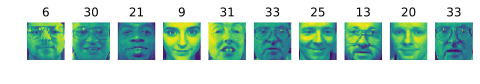

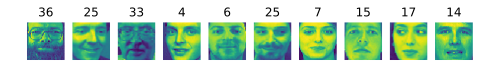

In [375]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = train_x[i*batch_size: (i+1)*batch_size]
            y = y_train[i*batch_size: (i+1)*batch_size]
            sesh.run(optimizer, feed_dict={X:x, Y:y})
            c = sesh.run(cost, feed_dict={X:x, Y:y})
        train_cost.append(c)
        
        if not epoch % 50000:
            print(f'epoch:{epoch:2d} cost={c:.4f}')
            
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: y_test})
    test_cost = sesh.run(cost, feed_dict={X:x, Y:y})
    print(f'Accuracy of test set: {acc * 100:.2f}%')
    
    correct_pred2 = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy2 = tf.reduce_mean(tf.cast(correct_pred2, tf.float32))
    acc2 = accuracy2.eval({X: train_x, Y: y_train})
    print(f'Accuracy of the trianing set: {acc2 * 100:.2f}%')
    
    
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    for img, ax in zip(train_x[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((64, 64)))
        ax.axis("off")
    plt.show()
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    for img, ax in zip(x_test[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((64, 64)))
        ax.axis("off")
    plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



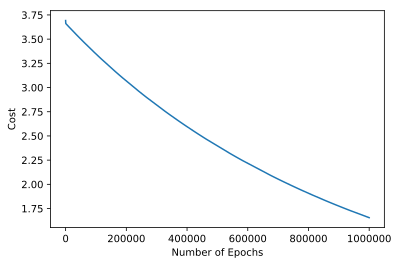

In [376]:

plt.plot(train_cost)
plt.ylabel("Cost")
plt.xlabel("Number of Epochs")
print(train_cost)